In [63]:
from skimage import img_as_float, io, img_as_uint, img_as_ubyte
import matplotlib.pyplot as plt
import torch
from fiber_extraction import FiberExtractor, UNet
from skimage import exposure

In [64]:
net = UNet(1, 1, 16, True).eval()
net.load_state_dict(torch.load('netG-16-20k-unaug.pt'))
fiber_extractor = FiberExtractor(net)

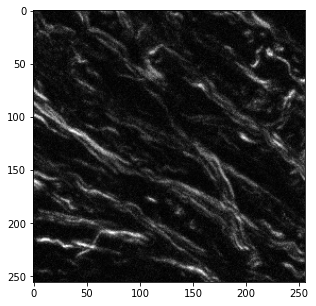

In [67]:
im_arr = img_as_uint(io.imread('example_input_2.png'))
plt.figure(figsize=(5, 5))
plt.imshow(im_arr, cmap='gray')
plt.show()

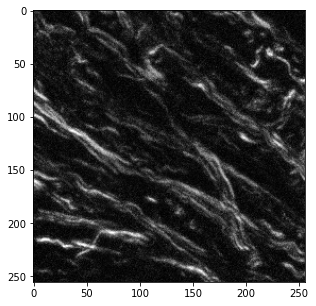

In [68]:
im_arr = img_as_uint(exposure.adjust_log(io.imread('example_input_2.png'))) # adjust contrast if necessary
plt.figure(figsize=(5, 5))
plt.imshow(im_arr, cmap='gray')
plt.show()

Draw masks using skeletonization


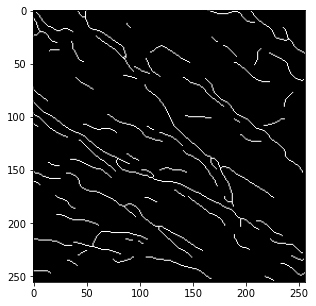

In [69]:
result = fiber_extractor.compute(im_arr, adjust_contrast=None)
plt.figure(figsize=(5, 5))
plt.imshow(result, cmap='gray')
plt.show()

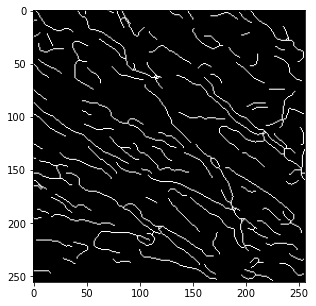

In [70]:
truth_mask = img_as_uint(io.imread('example_groundtruth_2.png'))
plt.figure(figsize=(5, 5))
plt.imshow(truth_mask, cmap='gray')
plt.show()

In [71]:
from centerline import CenterLine
import numpy as np
import math
import colorsys

### Create instance masks of fibers

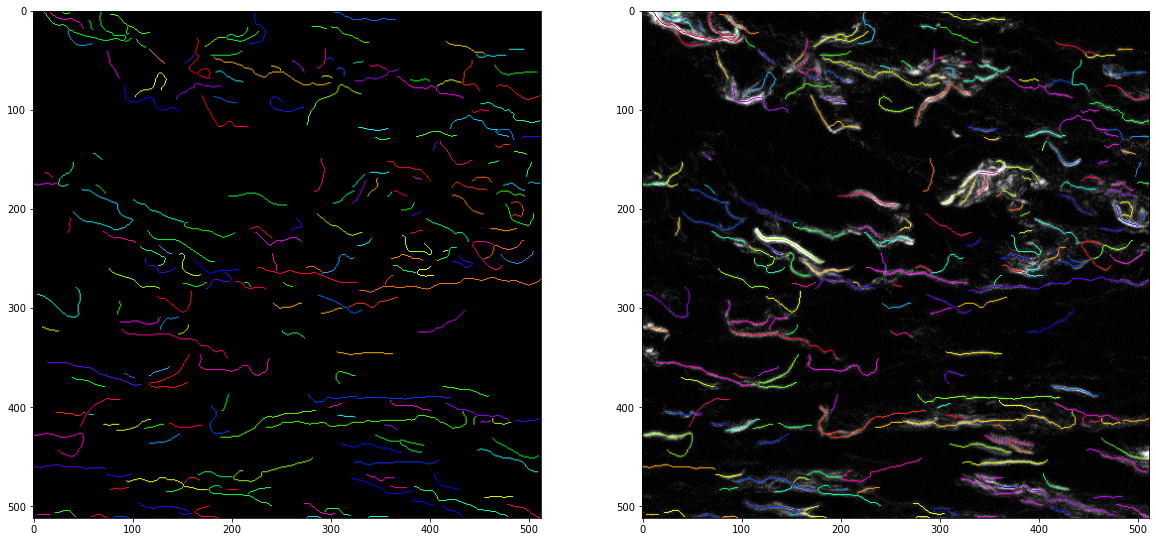

In [76]:
## instance masks
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
# centerline_res = CenterLine(centerline_image=result, associate_image=io.imread('example_input.png'))
centerline_res = CenterLine(centerline_image=io.imread('example_centerline.png'), associate_image=io.imread('example_image.tif'))
canvas = np.ones((centerline_res.image_size[0], centerline_res.image_size[1], 3), np.uint8) * 0
line_dict = centerline_res.line_dict
for k, v in line_dict.items():
    points = v.points
    image = np.zeros((512, 512), np.uint8)
    image = centerline_res.draw_line(points, image)
    (r, g, b) = colorsys.hsv_to_rgb(np.random.uniform(0, 1), 1.0, 1.0)
    R, G, B = int(255 * r), int(255 * g), int(255 * b)
    canvas[np.where(image>0)] = np.array([R, G, B])
ax[0].imshow(canvas)

### overlay
im_arr = img_as_uint(exposure.adjust_log(io.imread('example_image.tif')))
canvas = img_as_ubyte(np.repeat(im_arr[:, :, np.newaxis], 3, axis=2)) 
line_dict = centerline_res.line_dict
for k, v in line_dict.items():
    points = v.points
    image = np.zeros((512, 512), np.uint8)
    image = centerline_res.draw_line(points, image)
    (r, g, b) = colorsys.hsv_to_rgb(np.random.uniform(0, 1), 1.0, 1.0)
    R, G, B = int(255 * r), int(255 * g), int(255 * b)
    canvas[np.where(image>0)] = np.array([R, G, B])
ax[1].imshow(canvas)
plt.show()